In [1]:
import os
import pathlib
import parse_mom_sis_results as pmsr
import plot_pandas_data as ppd

In [2]:
log_basenames_025 = (
    "logfile.048x20.AVX2-REPRO.0.1m logfile.048x20.AVX2-REPRO.1.1m logfile.048x20.AVX2-REPRO.2.1m " + 
    "logfile.048x20.noht.AVX512.0.1m logfile.048x20.noht.AVX512.1.1m logfile.048x20.noht.AVX512.2.1m logfile.048x20.noht.AVX512.3.1m logfile.048x20.noht.AVX512.4.1m " +
    "logfile.048x20.noht.AVX512-REPRO.0.1m logfile.048x20.noht.AVX512-REPRO.1.1m logfile.048x20.noht.AVX512-REPRO.3.1m logfile.048x20.noht.AVX512-REPRO.4.1m logfile.048x20.noht.AVX512-REPRO.5.1m " +
    "logfile.048x40.AVX2-REPRO.0.1m logfile.048x40.AVX2-REPRO.1.1m logfile.048x40.AVX2-REPRO.2.1m " +
    "logfile.096x40.AVX2-REPRO.0.1m logfile.096x40.AVX2-REPRO.1.1m logfile.096x40.AVX2-REPRO.2.1m " + 
    "logfile.096x80.AVX2-REPRO.0.1m logfile.096x80.AVX2-REPRO.1.1m logfile.096x80.AVX2-REPRO.2.1m " +
    "logfile.192x80.AVX2-REPRO.2.1m logfile.192x80.AVX2-REPRO.3.1m logfile.192x80.AVX2-REPRO.4.1m " +
    "logfile.192x80.noht.AVX512.0.1m logfile.192x80.noht.AVX512.1.1m logfile.192x80.noht.AVX512.2.1m logfile.192x80.noht.AVX512.3.1m logfile.192x80.noht.AVX512.4.1m " +
    "logfile.192x80.noht.AVX512-REPRO.0.1m logfile.192x80.noht.AVX512-REPRO.1.1m logfile.192x80.noht.AVX512-REPRO.2.1m logfile.192x80.noht.AVX512-REPRO.3.1m"
)

In [3]:
log_basenames_01 = (
    "logfile.0.1.048x20.AVX512-REPRO.0.1d logfile.0.1.048x40.AVX512-REPRO.0.1d logfile.0.1.096x40.AVX512-REPRO.0.1d logfile.0.1.096x80.AVX512-REPRO.0.1d logfile.0.1.192x80.AVX512-REPRO.0.1d " + 
    "logfile.0.1.048x20.AVX512-REPRO.1.1d logfile.0.1.048x40.AVX512-REPRO.1.1d logfile.0.1.096x40.AVX512-REPRO.1.1d logfile.0.1.096x80.AVX512-REPRO.1.1d logfile.0.1.192x80.AVX512-REPRO.1.1d " +
    "logfile.0.1.048x20.AVX512-REPRO.2.1d logfile.0.1.048x40.AVX512-REPRO.2.1d logfile.0.1.096x40.AVX512-REPRO.2.1d logfile.0.1.096x80.AVX512-REPRO.2.1d logfile.0.1.192x80.AVX512-REPRO.2.1d"
)

In [4]:
mom_sis_work_dir = pathlib.PurePath("../mom-sis/src/mom/work/")
log_dirname_025 = os.path.join(mom_sis_work_dir,"global_0.25_degree_NYF","logs.1m")
log_dirname_01 = os.path.join(mom_sis_work_dir,"global_0.1_degree","logs.1d")

In [5]:
logfiles_025 = [os.path.join(log_dirname_025, basename) for basename in log_basenames_025.split()]
logfiles_01 = [os.path.join(log_dirname_01, basename) for basename in log_basenames_01.split()]

In [6]:
df_025 = pmsr.parse_all(logfiles_025)
df_01 = pmsr.parse_all(logfiles_01)

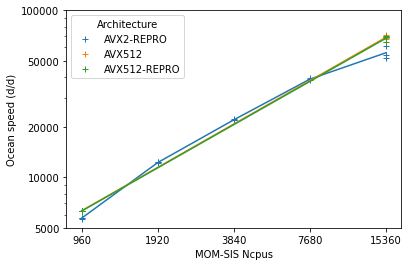

In [7]:
ppd.loglog_by_group("ncpus", "Ocean speed", 
    by="arch", 
    data=df_025,
    xlabel="MOM-SIS Ncpus",
    ylabel="Ocean speed (d/d)",
    yticks = [5000,10000,20000,50000,100000],
    legend_title="Architecture")

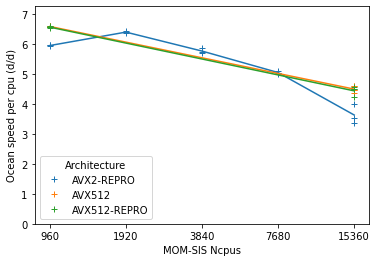

In [8]:
ppd.semilogx_by_group("ncpus", "Ocean speed per cpu", 
    by="arch", 
    data=df_025,
    xlabel="MOM-SIS Ncpus",
    ylabel="Ocean speed per cpu (d/d)",
    yticks = [],
    legend_title="Architecture")

In [9]:
mean_025_speed=dict()
group_025_arch=df_025.groupby("arch")
for name, group in group_025_arch:
    means = group.groupby("ncpus")["Ocean speed"].mean()
    mean_025_speed[name] = means
print(round(mean_025_speed["AVX512-REPRO"][960] / mean_025_speed["AVX2-REPRO"][960],2))
print(round(mean_025_speed["AVX512-REPRO"][15360] / mean_025_speed["AVX2-REPRO"][15360],2))

1.1
1.22


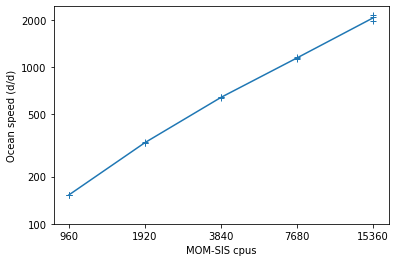

In [10]:
xticks_01=df_01["ncpus"].sort_values().unique()
ppd.loglog("ncpus","Ocean speed",
       data=df_01,
       xlabel="MOM-SIS cpus",
       ylabel="Ocean speed (d/d)",
       xticks=xticks_01,
       yticks=[100,200,500,1000,2000])

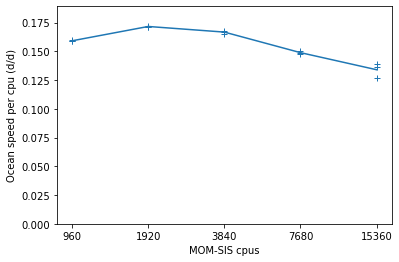

In [11]:
ppd.semilogx("ncpus","Ocean speed per cpu",
    data=df_01,
    xlabel="MOM-SIS cpus",
    ylabel="Ocean speed per cpu (d/d)",
    xticks=xticks_01,
    yticks=[])